<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/Copy_of_JUMANA_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn import metrics

In [16]:
data = pd.read_csv("/content/drive/MyDrive/csv all/6500-features_bilstm_train (4).csv")

<ipython-input-16-bcd96fe01e14>:1: DtypeWarning: Columns (2048) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/csv all/6500-features_bilstm_train (4).csv")


In [17]:
data = data[:6500]

In [18]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047,label
0,1.671635,1.247548,-3.707781,0.854562,0.535234,4.885690,0.814341,-3.763716,0.152432,-0.793640,...,0.373067,1.364600,-1.304008,-0.337862,-2.229231,2.402244,0.958295,-1.005656,-1.726494,Tuberculosis
1,-1.659126,-0.243235,1.079076,-0.550394,-0.316553,-1.796846,0.409488,-1.281389,0.120222,-0.504539,...,-1.219192,-0.162628,-0.257999,-0.425029,1.063659,-0.332706,0.884623,0.476737,-1.157819,Normal
2,-0.859179,-0.592448,-3.147495,1.428116,-0.894100,2.228792,1.297718,-0.563693,0.978313,0.271904,...,-0.389597,-0.701721,0.226449,-1.189268,-1.042612,2.030346,1.486454,0.612136,0.152113,Tuberculosis
3,1.187206,0.211070,-0.126817,0.559956,1.134729,-0.137076,0.568373,-2.818909,0.727778,-0.631632,...,-0.093335,0.761251,-0.617068,-1.376532,-0.726815,0.872411,0.045450,-0.375882,-1.466358,Bacterial Pneumonia
4,0.301324,-0.021904,-0.002692,-0.079898,0.793380,-0.041666,0.072046,-1.794549,0.296195,-0.400587,...,-0.965708,0.254815,-0.448109,-0.837355,-0.003112,0.502651,0.120440,-0.384911,-0.918134,Viral Pneumonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,-1.451256,0.097534,0.462612,-0.769410,-0.652287,-1.309683,0.619584,-1.600125,0.097622,-0.565811,...,-1.529840,0.032468,-0.371372,-0.356813,0.929851,-0.117711,0.818128,0.331770,-1.100549,Normal
6496,1.671635,1.247548,-3.707781,0.854562,0.535234,4.885690,0.814341,-3.763716,0.152432,-0.793640,...,0.373067,1.364600,-1.304008,-0.337862,-2.229231,2.402244,0.958295,-1.005656,-1.726494,Tuberculosis
6497,-1.659126,-0.243235,1.079076,-0.550394,-0.316553,-1.796846,0.409488,-1.281389,0.120222,-0.504539,...,-1.219192,-0.162628,-0.257999,-0.425029,1.063659,-0.332706,0.884623,0.476737,-1.157819,Normal
6498,-0.859179,-0.592448,-3.147495,1.428116,-0.894100,2.228792,1.297718,-0.563693,0.978313,0.271904,...,-0.389597,-0.701721,0.226449,-1.189268,-1.042612,2.030346,1.486454,0.612136,0.152113,Tuberculosis


In [19]:
y = data['label']

In [20]:
y

0              Tuberculosis
1                    Normal
2              Tuberculosis
3       Bacterial Pneumonia
4           Viral Pneumonia
               ...         
6495                 Normal
6496           Tuberculosis
6497                 Normal
6498           Tuberculosis
6499    Bacterial Pneumonia
Name: label, Length: 6500, dtype: object

In [21]:
print(np.unique(y))

['Bacterial Pneumonia' 'Corona Virus Disease' 'Normal' 'Tuberculosis'
 'Viral Pneumonia']


In [22]:
X = data.drop(['label'], axis=1)

In [23]:
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2038,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047
0,1.671635,1.247548,-3.707781,0.854562,0.535234,4.885690,0.814341,-3.763716,0.152432,-0.793640,...,-2.042422,0.373067,1.364600,-1.304008,-0.337862,-2.229231,2.402244,0.958295,-1.005656,-1.726494
1,-1.659126,-0.243235,1.079076,-0.550394,-0.316553,-1.796846,0.409488,-1.281389,0.120222,-0.504539,...,-0.235365,-1.219192,-0.162628,-0.257999,-0.425029,1.063659,-0.332706,0.884623,0.476737,-1.157819
2,-0.859179,-0.592448,-3.147495,1.428116,-0.894100,2.228792,1.297718,-0.563693,0.978313,0.271904,...,0.021831,-0.389597,-0.701721,0.226449,-1.189268,-1.042612,2.030346,1.486454,0.612136,0.152113
3,1.187206,0.211070,-0.126817,0.559956,1.134729,-0.137076,0.568373,-2.818909,0.727778,-0.631632,...,-0.411535,-0.093335,0.761251,-0.617068,-1.376532,-0.726815,0.872411,0.045450,-0.375882,-1.466358
4,0.301324,-0.021904,-0.002692,-0.079898,0.793380,-0.041666,0.072046,-1.794549,0.296195,-0.400587,...,-0.572141,-0.965708,0.254815,-0.448109,-0.837355,-0.003112,0.502651,0.120440,-0.384911,-0.918134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,-1.451256,0.097534,0.462612,-0.769410,-0.652287,-1.309683,0.619584,-1.600125,0.097622,-0.565811,...,-0.606055,-1.529840,0.032468,-0.371372,-0.356813,0.929851,-0.117711,0.818128,0.331770,-1.100549
6496,1.671635,1.247548,-3.707781,0.854562,0.535234,4.885690,0.814341,-3.763716,0.152432,-0.793640,...,-2.042422,0.373067,1.364600,-1.304008,-0.337862,-2.229231,2.402244,0.958295,-1.005656,-1.726494
6497,-1.659126,-0.243235,1.079076,-0.550394,-0.316553,-1.796846,0.409488,-1.281389,0.120222,-0.504539,...,-0.235365,-1.219192,-0.162628,-0.257999,-0.425029,1.063659,-0.332706,0.884623,0.476737,-1.157819
6498,-0.859179,-0.592448,-3.147495,1.428116,-0.894100,2.228792,1.297718,-0.563693,0.978313,0.271904,...,0.021831,-0.389597,-0.701721,0.226449,-1.189268,-1.042612,2.030346,1.486454,0.612136,0.152113


In [24]:
X = X.values #.reshape(1, -1)

In [25]:
X

array([[ 1.671635  ,  1.2475476 , -3.7077808 , ...,  0.9582946 ,
        -1.0056562 , -1.7264942 ],
       [-1.6591263 , -0.24323462,  1.0790759 , ...,  0.88462335,
         0.47673738, -1.1578186 ],
       [-0.8591794 , -0.5924479 , -3.1474946 , ...,  1.4864539 ,
         0.61213577,  0.15211307],
       ...,
       [-1.6591263 , -0.24323462,  1.0790759 , ...,  0.88462335,
         0.47673738, -1.1578186 ],
       [-0.8591794 , -0.5924479 , -3.1474946 , ...,  1.4864539 ,
         0.61213577,  0.15211307],
       [ 1.1872059 ,  0.21106996, -0.12681678, ...,  0.04544979,
        -0.3758816 , -1.4663582 ]])

In [26]:
len(X)

6500

In [27]:
# name_labels = { 0: 'Benign', 1: 'DrDoS_DNS', 2: 'DrDoS_LDAP', 3: 'DrDoS_MSSQL', 4:'DrDoS_NTP', 5:'DrDoS_NetBIOS', 6:'DrDoS_SNMP', 7:'DrDoS_UDP', 8:'LDAP', 9:'MSSQL', 10:'NetBIOS', 11:'Portmap', 12:'Syn', 13:'TFTP', 14:'UDP', 15:'UDP-lag', 16:'UDPLag', 17:'WebDDoS'}

In [28]:
name_labels = { 0:'Atelectasis', 1:'Cardiomegaly', 2:'Consolidation', 3:'Edema', 4:'Effusion', 5:'Emphysema', 6:'Fibrosis', 7:'Hernia', 8:'Infiltration', 9:'Mass', 10:'No Finding', 11:'Nodule', 12:'Pleural_Thickening', 13:'Pneumonia ', 14:'Pneumothorax'}

In [29]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y)

y_one_hot = to_categorical(encoded_labels)

In [30]:
y_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [31]:
np.unique(y_one_hot)

array([0., 1.], dtype=float32)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [33]:
y_train

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [34]:
len(X_train)

5200

In [35]:
len(y_train)

5200

In [36]:
X_train.shape

(5200, 2048)

In [37]:
y_train = np.argmax(y_train, axis=1)

In [38]:
y_train.shape

(5200,)

In [39]:
# Building a Support Vector Machine on train data
svc_model = SVC(C=.1, kernel='linear', gamma=1,probability= True)
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear', probability=True)

In [40]:
y_val=  np.argmax(y_val, axis=1)

In [41]:
prediction = svc_model .predict(X_val)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_val, y_val))

1.0
1.0


In [42]:
y_val_pred = svc_model.predict(X_val)
classification_rep = classification_report(y_val, y_val_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00       203
           2       1.00      1.00      1.00       395
           3       1.00      1.00      1.00       248
           4       1.00      1.00      1.00       144

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



Confusion Matrix:
[[310   0   0   0   0]
 [  0 203   0   0   0]
 [  0   0 395   0   0]
 [  0   0   0 248   0]
 [  0   0   0   0 144]]


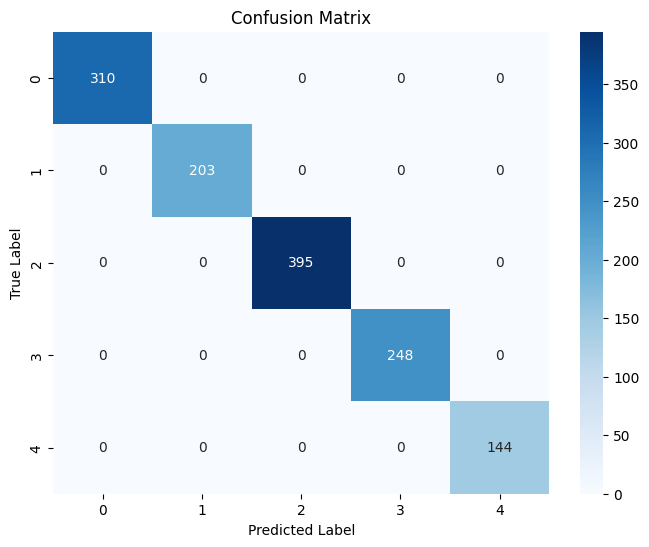

In [43]:
# Step 5: Create the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(cm)

# Step 6: Plot the confusion matrix
class_names = sorted(list(set(y_val)))  # Assuming class labels are strings

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


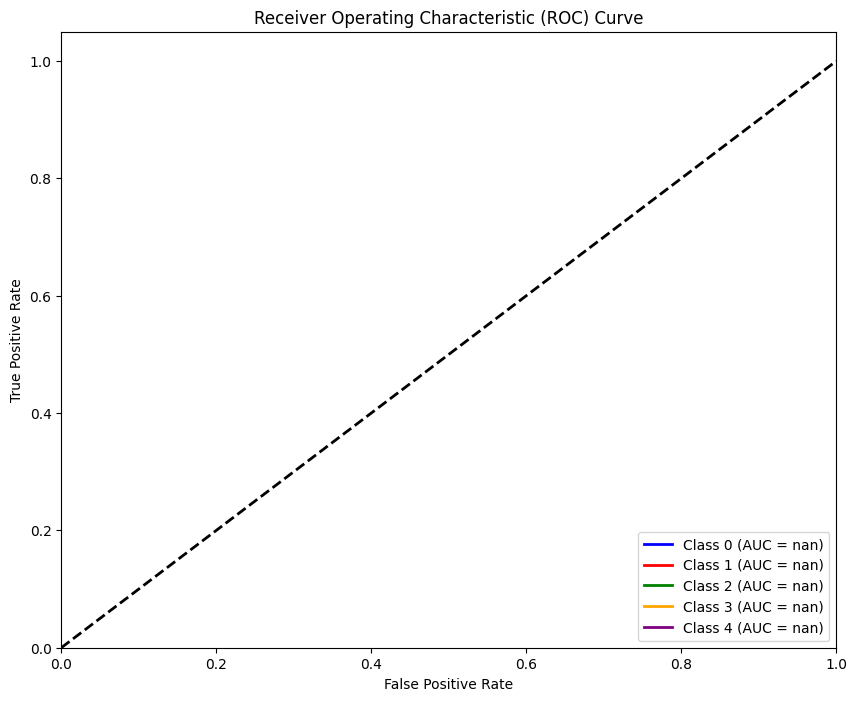

In [45]:
# Step 4: Make predictions on the test set
y_scores = svc_model.predict_proba(X_val)

# Step 5: Convert labels to binary matrix
y_test_bin = label_binarize(y_val, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Step 6: Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 7: Plot AUC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown'])  # Customize the colors as per the number of classes

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Create and train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_model.predict(X_val)

# Check the accuracy on the training and validation sets
train_accuracy = nb_model.score(X_train, y_train)
val_accuracy = nb_model.score(X_val, y_val)
print('Training Accuracy: {:.2f}%'.format(train_accuracy * 100))
print('Validation Accuracy: {:.2f}%'.format(val_accuracy * 100))

# Calculate and print the classification report
classification_rep = classification_report(y_val, y_val_pred)
print("Classification Report:")
print(classification_rep)


Training Accuracy: 93.85%
Validation Accuracy: 93.38%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       0.70      1.00      0.83       203
           2       1.00      1.00      1.00       395
           3       1.00      0.65      0.79       248
           4       1.00      1.00      1.00       144

    accuracy                           0.93      1300
   macro avg       0.94      0.93      0.92      1300
weighted avg       0.95      0.93      0.93      1300

